<a href="https://colab.research.google.com/github/IMI1998/brain-tomur-detection/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("preetviradiya/brian-tumor-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brian-tumor-dataset


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.run_functions_eagerly(True)

In [12]:
img_dir = '/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set'

In [16]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,1)

In [17]:
data_gen = ImageDataGenerator(rescale=1./255,
                              validation_split = 0.2)

In [18]:
train_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

Found 3681 images belonging to 2 classes.


In [19]:
val_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=False,
                                        class_mode = "binary",
                                        subset = "validation")

Found 919 images belonging to 2 classes.


In [20]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['Brain Tumor', 'Healthy']


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,BatchNormalization, Flatten, Dropout

In [22]:
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(150, 150, 1)))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,239,489 (81.02 MB)

 Trainable params: 21,239,489 (81.02 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
with tf.device('/device:GPU:0'):
    history = model.fit(train_gen,verbose=1,epochs=5,validation_data=val_gen,steps_per_epoch = 3681//64,validation_steps = 919//64)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 449ms/step - accuracy: 0.6183 - loss: 0.8900 - val_accuracy: 0.8672 - val_loss: 0.3128
Epoch 2/5
 1/57 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.8594 - loss: 0.3382

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8594 - loss: 0.3382 - val_accuracy: 0.8471 - val_loss: 0.3335
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.8711 - loss: 0.2926 - val_accuracy: 0.9208 - val_loss: 0.2012
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9375 - loss: 0.2268 - val_accuracy: 0.8717 - val_loss: 0.2745
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.9521 - loss: 0.1462 - val_accuracy: 0.9766 - val_loss: 0.0767


In [26]:
test_loss, test_acc   = model.evaluate(val_gen)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9690 - loss: 0.0890


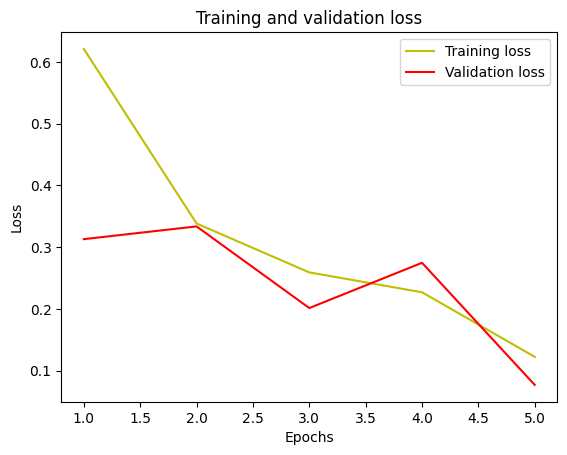

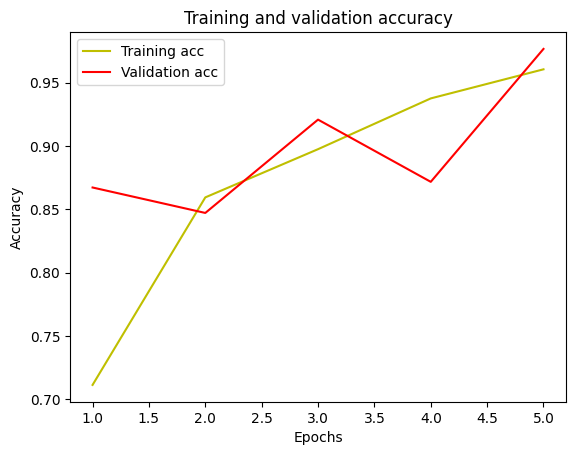

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
model.save('model.h5')

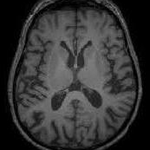

In [31]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps


data = np.ndarray(shape=(1,150, 150, 1), dtype=np.float32)
image = Image.open(f'/kaggle/input/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1631).jpg')
#image = Image.open(f'/Users/adityavs14/Documents/Internship/Pianalytix/Brain_tumor/ML_model/Brain_Tumor_Data_Set/Brain_Tumor/Cancer (1895).jpg')
size = (150, 150)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image, size, Image.LANCZOS)
image_array = np.asarray(image)
display(image)
#normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data = image_array.reshape((-1,150,150,1))

In [32]:
prediction = model.predict(data)
print(prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1.0
